In [1]:
import pandas as pd

In [3]:
data=pd.read_csv('IPL Matches.csv')
data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [4]:
data.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [5]:
data2=pd.get_dummies(data)

In [18]:
from sklearn.impute import KNNImputer

imputer=KNNImputer()
fdf=pd.DataFrame(imputer.fit_transform(data2.drop('id',axis=1)),columns=data2.drop('id',axis=1).columns)
fdf.head()

,neutral_venue,result_margin,city_Abu Dhabi,city_Ahmedabad,city_Bangalore,city_Bengaluru,city_Bloemfontein,city_Cape Town,city_Centurion,city_Chandigarh,...,umpire2_SJ Davis,umpire2_SJA Taufel,umpire2_SK Tarapore,umpire2_SL Shastri,umpire2_SS Hazare,umpire2_Subroto Das,umpire2_TH Wijewardene,umpire2_VA Kulkarni,umpire2_VK Sharma,umpire2_YC Barde
0,0.0,140.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
from sklearn.preprocessing import StandardScaler

std=StandardScaler()
data_scld=pd.DataFrame(std.fit_transform(fdf),columns=fdf.columns)
data_scld

,neutral_venue,result_margin,city_Abu Dhabi,city_Ahmedabad,city_Bangalore,city_Bengaluru,city_Bloemfontein,city_Cape Town,city_Centurion,city_Chandigarh,...,umpire2_SJ Davis,umpire2_SJA Taufel,umpire2_SK Tarapore,umpire2_SL Shastri,umpire2_SS Hazare,umpire2_Subroto Das,umpire2_TH Wijewardene,umpire2_VA Kulkarni,umpire2_VK Sharma,umpire2_YC Barde
0,-0.322792,5.594115,-0.191960,-0.122169,3.399095,-0.136845,-0.049568,-0.09302,-0.122169,-0.271448,...,-0.035028,-0.266207,-0.181415,-0.127237,-0.086066,-0.035028,-0.078519,-0.198722,-0.158511,-0.078519
1,-0.322792,0.711685,-0.191960,-0.122169,-0.294196,-0.136845,-0.049568,-0.09302,-0.122169,3.683942,...,-0.035028,-0.266207,-0.181415,7.859340,-0.086066,-0.035028,-0.078519,-0.198722,-0.158511,-0.078519
2,-0.322792,-0.383439,-0.191960,-0.122169,-0.294196,-0.136845,-0.049568,-0.09302,-0.122169,-0.271448,...,-0.035028,-0.266207,-0.181415,-0.127237,-0.086066,-0.035028,-0.078519,-0.198722,-0.158511,-0.078519
3,-0.322792,-0.565960,-0.191960,-0.122169,-0.294196,-0.136845,-0.049568,-0.09302,-0.122169,-0.271448,...,-0.035028,-0.266207,-0.181415,-0.127237,-0.086066,-0.035028,-0.078519,-0.198722,-0.158511,-0.078519
4,-0.322792,-0.565960,-0.191960,-0.122169,-0.294196,-0.136845,-0.049568,-0.09302,-0.122169,-0.271448,...,-0.035028,-0.266207,-0.181415,-0.127237,-0.086066,-0.035028,-0.078519,-0.198722,-0.158511,-0.078519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,-0.322792,-0.091406,-0.191960,-0.122169,-0.294196,-0.136845,-0.049568,-0.09302,-0.122169,-0.271448,...,-0.035028,-0.266207,-0.181415,-0.127237,-0.086066,-0.035028,-0.078519,-0.198722,-0.158511,-0.078519
812,-0.322792,1.806810,-0.191960,-0.122169,-0.294196,-0.136845,-0.049568,-0.09302,-0.122169,-0.271448,...,-0.035028,-0.266207,-0.181415,-0.127237,-0.086066,-0.035028,-0.078519,-0.198722,-0.158511,-0.078519
813,-0.322792,-0.520329,5.209408,-0.122169,-0.294196,-0.136845,-0.049568,-0.09302,-0.122169,-0.271448,...,-0.035028,-0.266207,-0.181415,-0.127237,-0.086066,-0.035028,-0.078519,-0.198722,-0.158511,-0.078519
814,-0.322792,-0.018397,5.209408,-0.122169,-0.294196,-0.136845,-0.049568,-0.09302,-0.122169,-0.271448,...,-0.035028,-0.266207,-0.181415,-0.127237,-0.086066,-0.035028,-0.078519,-0.198722,-0.158511,-0.078519


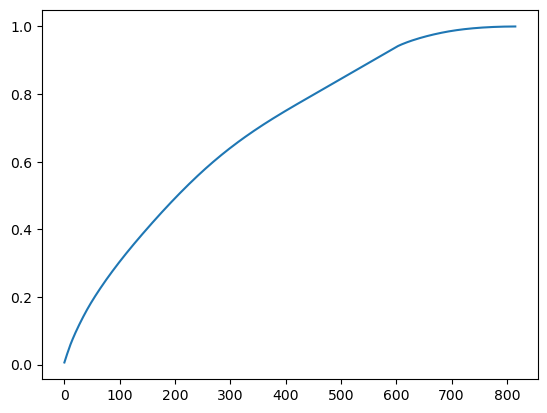

In [27]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

var=np.cumsum(PCA(n_components=len(data_scld)).fit(data_scld).explained_variance_ratio_)
plt.plot(var)

In [33]:
var[-200:-100]

array([0.95121854, 0.951851  , 0.95247247, 0.95308906, 0.95369948,
       0.95430465, 0.95489742, 0.9554861 , 0.95606807, 0.9566347 ,
       0.95719838, 0.95775203, 0.95829916, 0.95884351, 0.95938009,
       0.95991287, 0.96044099, 0.96096318, 0.96148354, 0.96200002,
       0.9625132 , 0.96302141, 0.96352529, 0.96402285, 0.96451646,
       0.96500503, 0.96548846, 0.96596367, 0.96643852, 0.96691052,
       0.96737557, 0.96783529, 0.96829233, 0.96874011, 0.96918641,
       0.96963169, 0.97006845, 0.97050266, 0.97093662, 0.97136805,
       0.9717955 , 0.97221545, 0.97263491, 0.97304972, 0.97345793,
       0.97386365, 0.97426846, 0.97466751, 0.97506408, 0.97545208,
       0.97583901, 0.97622019, 0.97660017, 0.9769767 , 0.9773504 ,
       0.97772088, 0.97808507, 0.97844452, 0.97880127, 0.97915429,
       0.97950354, 0.97985158, 0.98019868, 0.98054394, 0.98088153,
       0.98121747, 0.98154869, 0.98187819, 0.98220615, 0.98252748,
       0.98284535, 0.9831607 , 0.98347173, 0.9837748 , 0.98407

In [35]:
pca=PCA(len(data_scld)-100)

pcs=pca.fit_transform(data_scld)

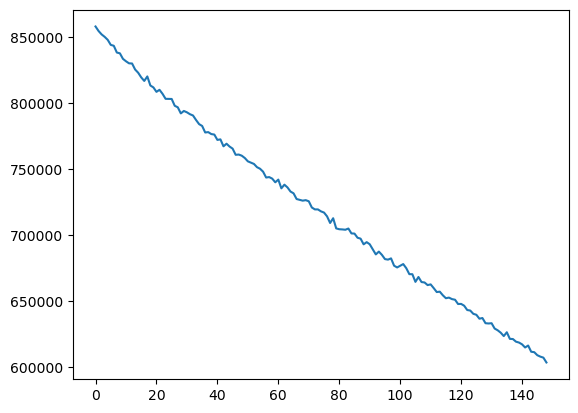

In [42]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,150):
    wcss.append(KMeans(n_clusters=i).fit(pcs).inertia_)

plt.plot(wcss)

<p style='color:Green;font-size:20px;text-align:center;background-color:orange;padding:15px;border:dotted'>Hence i infer that ipl matches are completely random or the reality analysis makes no sense and why would  do that when i am not an analyst but a data scientist</p>